In [1]:
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex

initialization  
$ \newcommand{\E}[1]{\mathbb{E}\left[#1\right]}$  
$ \newcommand{\V}[1]{\mathbb{V}\left[#1\right]}$
$ \newcommand{\EXP}[1]{\exp\left(#1\right)}$  
$ \newcommand{\P}{\mathbb{P}}$
$
\newcommand{\sumnN}{\sum_{n=1}^{N}}
\newcommand{\arrthree}[1]{
\begin{array}{rlr}
#1
\end{array}
}
\newcommand{\mat}[1]{
\left[
\begin{matrix}
#1
\end{matrix}
\right]
}
$
$
\newcommand{\dmc}{\mathcal{D}}
$
$
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Abt}{\Ab^T}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\Ib}{\mathbf{I}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\WbT}{\widetilde{\mathbf{W}}}
\newcommand{\wbt}{\wb^T}
\newcommand{\Wbt}{\Wb^T}
\newcommand{\WbTt}{\WbT^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xbT}{\tilde{\xb}}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\XbT}{\widetilde{\Xb}}
\newcommand{\Xbt}{\Xb^T}
\newcommand{\XbTt}{\XbT^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\Phib}{\pmb{\Phi}}
$
$\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\hx}{h(\xb)}
\newcommand{\yx}{y(\xb; \mathcal{D})}
\newcommand{\ed}[1]{\mathbb{E}_D\left[ #1 \right]}
\newcommand{\edyx}{\ed{\yx}}
\newcommand{\px}{~p(\xb)}
\newcommand{\dx}{~d\xb}
\newcommand{\pxdx}{\px \dx}
\newcommand{\li}{\Lambda^{-1}}
$

Introduction
============

* In regression, we used $y(\xb) = \wbt \xb + w_o$
* But we need a discrete output
* Thus, we define $y(\xb) = f(\wbt \xb + w_o)$
* Here, f(.) is a nonlinear function
  * called as activation function in ML
  * $f^{-1}$ called link function in statistics
* f(.) is called *Generalized linear model* since the decision surfaces correspond to f(.) = const => $\wbt \xb + w_0$ = constant

Least squares for classification
-------------------------------

* Let there be K classes $\{\mathcal{C}_k\}$, each with its own linear model
$$
y_k(\xb) = \wb_k^T  \xb + w_{k0}
$$

* These can be grouped together as 
$$
\yb(\xb) = \WbTt \xbT
$$
where
$$
\WbT = 
\mat{
w_{10} & w_{20} & \cdots & w_{K0} \\
\wb_1 & \wb_2 & \cdots & \wb_{K}
}
\hspace{20pt}
\xbT = \mat{1 \\ \xb}
$$



* Training set $\{\xb_n, \tb_n \}_{n=1}^{N}$
* Let 
$$
\Tb = \mat{
\vdots \\
\tb_n^T \\
\vdots \\
}
\hspace{20pt}
\XbT = \mat{
\vdots \\
\xbT_n^T \\
\vdots
}
$$
* Sum of squres error function becomes
$$
E_D(\WbT)
=
\frac{1}{2}
Tr
\left\{
\left( \XbT \WbT - \Tb \right)^T
\left( \XbT \WbT - \Tb \right)
\right\}
$$

lets consider Tr($(\Xb\Wb - \Tb)^T(\Xb\Xb - \Tb)$)
$$
\arrthree{
d E_D
&=
d ~tr\left\{(\Xb\Wb - \Tb)^T(\Xb\Xb - \Tb)\right\}
\\ &=
d ~tr\left\{ \Wbt\Xbt\Xb\Wb - \Wbt\Xbt\Tb - \Tb^T\Xb\Wb - \Tb^T\Tb \right\}
\\ &=
tr\left\{ d(\Wbt)\Xbt\Xb\Wb + \Wbt\Xbt\Xb ~d(\Wb) - d(\Wbt)\Xbt\Tb - \Tb^T\Xb~d(\Wb) \right\}
\\ &=
tr\left\{ (d\Wb)^T\Xbt\Xb\Wb + \Wbt\Xbt\Xb ~d\Wb - (d\Wb)^T\Xbt\Tb - \Tb^T\Xb~d\Wb \right\}
\\ &=
tr\left\{\Wbt\Xbt\Xb ~d\Wb \right\}
+
tr\left\{\Wbt\Xbt\Xb ~d\Wb \right\}
- 
tr\left\{\Tb^T\Xb~d\Wb \right\}
-
tr\left\{\Tb^T\Xb~d\Wb \right\}
\\ &=
2 ~tr \left\{ \left(\Wbt\Xbt\Xb - \Tb^T\Xb \right) ~d\Wb \right\}
}
$$
Hence
$$
\arrthree{
\frac{d ~E_D}{d\Wb}
&=
\Wbt\Xbt\Xb - \Tb^T\Xb
& \color{gray}{\text{Denominator layout}}
\\
&=
\Xbt\Xb\Wb - \Xbt\Tb
& \color{gray}{\text{Numerator layout}}
}
$$

$$
\frac{E_D\left(\WbT\right)}{d\WbT}
=
\XbTt\XbT\WbT - \XbTt\Tb
$$
Setting this to zero, we get
$$
\WbT = \left( \XbTt \XbT \right)^{-1} \XbTt \Tb
= \XbT^\dagger \Tb
$$
The discriminant function becomes
$$
\yb(\xb) = \WbTt \xb = \Tb^T \left( \XbT^\dagger \right)^T \xb
$$

In [2]:
def compute_w(X,T):
    Xt = np.matrix(X.transpose())
    W = np.linalg.inv(Xt*X) * Xt * T
    W = np.matrix(W)
    #print('W')
    #print(W)
    return W

def plot_regions(W, resolution=40):
    x = np.linspace(-4,8,resolution)
    y = np.linspace(-8,4,resolution)
    Wt = W.transpose()
    for xx in x:
        for yy in y:
            result = Wt * np.matrix((1,xx,yy)).reshape(3,1)
            clr_result = 'r' if(result[0,0]>result[1,0]) else 'b'
            plt.plot(xx,yy, 'o', color=clr_result, markersize=2)

def find_y(W, x, y_arr):
    pts_current = np.matrix(np.vstack((np.ones_like(y_arr),np.ones_like(y_arr)*x, y_arr)))
    vals = W.transpose()*pts_current
    diff = (vals[0,:] - vals[1,:]).tolist()[0]
    ix_first = next((xx1[0] for xx1 in enumerate(diff) if xx1[1]>0),-1)
    return y_arr[ix_first]

def plot_line():
    xplot = np.linspace(-4,4,100)
    yplot = xplot
    plt.plot(xplot, yplot, label='expected seperation')
    plt.xlim(-4,8)
    plt.ylim(-8,4)
    # plt.legend(loc='lower right')

In [5]:
def points_class1():
    n1 = 50
    x1 = np.random.rand(n1)*8-4
    x1 = np.random.normal(0,2,(n1,1))
    y_noise = np.random.rand(n1)*3+0.3
    y1 = x1 + np.reshape(y_noise,x1.shape)
    x1_aug = np.hstack((np.ones_like(x1), x1,y1))
    t1 = np.hstack((np.ones_like(x1), np.zeros_like(x1)))
    plt.plot(x1, y1, '+', label='class1')
    return (x1_aug, t1)

def points_class2(add_outliers=False):
    n2 = 50
    x2 = np.random.rand(n2)*4
    x2 = np.random.normal(0,2,(n2,1))
    y_noise = np.random.rand(n2)*3+0.5
    y2 = x2 - np.reshape(y_noise,x2.shape)
    
    if add_outliers:
        n2_outlier = 10
        x2_outlier = np.random.rand(n2_outlier)*2+6
        y2_outlier = np.random.normal(-6,1,(n2_outlier,1))
        x2_outlier = x2_outlier.reshape((n2_outlier,1))
        x2 = np.vstack((x2,x2_outlier))
        y2 = np.vstack((y2,y2_outlier))
    
    x2_aug = np.hstack((np.ones_like(x2), x2,y2))
    t2 = np.hstack((np.zeros_like(x2), np.ones_like(x2)))
    plt.plot(x2, y2, 'o', label='class2')
    return (x2_aug, t2)




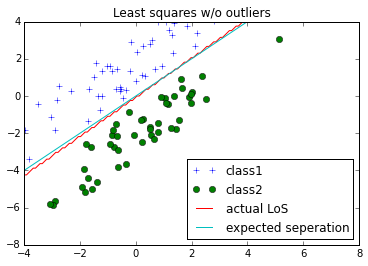

In [6]:
def show_solution(add_outliers=True):
    x1_aug, t1 = points_class1()
    x2_aug, t2 = points_class2(add_outliers)

    X = np.vstack((x1_aug,x2_aug))
    X = np.matrix(X)
    T = np.vstack((t1,t2))
    T = np.matrix(T)
    W = compute_w(X,T)
    
    x_end = 8 if add_outliers else 4
    x_actual = np.linspace(-4,x_end,100)
    y_arr = np.linspace(-8,4,100)
    y_actual = [find_y(W, xx, y_arr) for xx in x_actual]
    plt.plot(x_actual, y_actual, label='actual LoS')

    #plot_regions(W, resolution=resolution)
    plot_line()
    str_connector = 'with' if add_outliers else 'w/o'
    plt.title('Least squares '+str_connector+' outliers')
    location = 'lower center' if add_outliers else 'lower right'
    plt.legend(loc=location)
    plt.show()

#show_solution()
interact(show_solution)

Bayesian Logistic Regression
============================

Steps involved
1. Predictive = $\int sigmoid \times posterior$ 
1. posterior $\approx$ Gaussian using Laplace method
1. sigmoid = $\int dirac(.) \times sigmoid$
1. Hence Predictive = $\int gaussian (\int ~dirac ~sigmoid)$
1. Change the order of integration: $\int (gaussian ~dirac) ~sigmoid $
1. first term marginalizes to gaussian
1. predictive = $\int sigmoid ~gaussian$
1. sigmoid $\approx$ probit
1. predictive = $\int probit ~gaussian$
1. conv of probit with gaussian is another probit
1. predictive = probit
1. since probit $\approx$ sigmoid, we have predictive $\approx$ sigmoid

Predictive distribution
-----------------------

for a class $\mathcal{C}_1$ and a given feature vector $\phi(\xb)$ is obtained by marginalizing wrt to the posterior $p(\wb \mid \tb)$. That is,
$$
p(\mathcal{C}_1 \mid \phi, \tb)
= \int
p(\mathcal{C}_1 \mid \phi, \wb)
~p(\wb \mid \tb) ~d\wb
$$

Lap Apprx to posterior
-----------------------
The posterior can be approximated using laplace method as follows:

Gaussian prior is given by
$$
p(\wb) = \mathcal{N}(\wb \mid \mb_0, \Sb_0)
$$
Hence,
$$
p(\wb \mid \tb) \propto p(\wb) ~p(\tb \mid \wb)
$$

Thus,
$$
\arrthree{
\ln p(\wb \mid \tb)
&= -\frac12 (\wb-\mb_0)^T \Sb_0^{-1} (\wb-\mb_0)
&\commentgray{prior}
\\ 
&+
\sumnN t_n \ln y_n + (1-t_n) \ln (1-y_n)
&\commentgray{sigmoid likelihood}
\\
&+
\text{const}
}
$$

For the laplace approximation, the mode is $\wb_{MAP}$ and the cov is given by,
$$
\Sb_N = - \nabla \nabla \ln p(\wb \mid \tb)
= 
\Sb_{0}^{-1} + \sumnN y_n (1-y_n) \phi_n \phi_n^T
$$

Thus,
$$
p(\wb \mid \tb) \approx q(\wb) = \mathcal{N}(\wb \mid \wb_{MAP}, \Sb_N)
$$

Extracting the marginal
-----------------
Thus
$$
p(\mathcal{C}_1 \mid \phi, \tb)
= \int
p(\mathcal{C}_1 \mid \phi, \wb)
~p(\wb \mid \tb) ~d\wb
\approx
\int \sigma(\wbt\phi) q(\wb) ~d\wb
$$

* $\sigma(\wbt \phi)$ depends on $\wb$ only thro' its projection on $\phi$.
* Denote $a = \wbt \phi$ and we have,

$$
\sigma(\wbt \phi) = \int \delta(a - \wbt \phi) ~\sigma(a) ~da
$$
Sub this above, we have
$$
\arrthree{
\int \sigma(\wbt\phi) q(\wb) ~d\wb
&= 
\int 
     \left\{\int \delta(a - \wbt \phi) ~\sigma(a) ~da \right\}
     ~q(\wb) ~d\wb
\\ &= 
\int 
  \left\{
    \int ~q(\wb) \delta(a - \wbt \phi) ~d\wb
  \right\}
   ~\sigma(a) ~da
\\ &=
\int p(a) ~\sigma(a) ~da
}
$$

parameters of the marginal
---------------------------

$$
p(a) = \int \delta(a-\wbt\phi) ~q(\wb) ~d\wb
$$

* The delta function imposes a linear contraint since $a-\wbt\phi$ is a hyperplane and only those $\wb$'s which are on the hyperplane are chosen for the integrand. 
* This in effect trims outs $\wb \bot \phi$ and marginalizes $q(\wb)$.
* Since $q(\wb)$ is Gaussian, the marginal would be Gaussian as well
* we can find the mean and cov as follows

$$
\arrthree{
\mu_a = \E{a}
\\ &=
\int a ~p(a) ~da
\\ &=
\int \wbt \phi ~q(\wb) ~d\wb
\\
\mu_a &= \wb_{MAP}^{T} \phi
\\
\sigma_{a}^{2} = \text{var}[a]
\\ &=
\int \left\{ a^2 - \E{a}^2 \right\}^2 ~p(a) ~da
\\ &=
\int
  \left\{
    \left(\wbt \phi \right)^2 -
    \left( \mb_{N}^{T} \phi \right)
  \right\}
\\ &=
\phi^T \Sb_N \phi
}
$$

Thus,
$$
\arrthree{
p(\mathcal{C}_1 \mid \tb)
&=
\int \sigma(a) ~p(a) ~da
\\ &=
\int \sigma(a) ~\mathcal{N}(a \mid \mu_a,\sigma_{a}^{2}) ~da
}
$$

Probit
-------

Probit function $\Phi(a)$ is given by
$$
\Phi(a) = \int_{-\infty}^{a} \mathcal{N}(\theta \mid 0,1) ~d\theta
= \frac12 + \int_{0}^{a} \mathcal{N}(\theta \mid 0,1) ~d\theta
$$

This has close resemblance to the logistic sigmoid given by
$$
\sigma(a) = \frac1{1+e^{-a}}
$$

The best approximation is obtained by scaling the horizontal axis by $\lambda$ so that $\sigma(a) \approx \Phi(\lambda a)$

Suitable value for $\lambda$ can be obtained by ensuring that the slopes of sigmoid and probit to be the same at origin, which gives $\lambda^2 = \pi/8$

Thus,
$$
\arrthree{
p(\mathcal{C}_1 \mid \tb)
&=
\int \sigma(a) ~p(a) ~da
\\ &=
\int \sigma(a) ~\mathcal{N}(a \mid \mu_a,\sigma_{a}^{2}) ~da
\\ &=
\int \Phi(\lambda a) ~\mathcal{N}(a \mid \mu_a,\sigma_{a}^{2}) ~da
}
$$

convolving normal with probit
--------------------------

The adv of using probit is that its convolution with gaussian is another probit. that is
$$
\int \Phi(\lambda a) ~\mathcal{N}(a \mid \mu,\sigma^{2}) ~da
=
\phi
\left(
  \frac{\mu}
       {\left(
         \frac1{\lambda^2} + \sigma^2
        \right)^{1/2}}
\right)
$$

We can apply the approximation $\sigma(a) = \Phi(\lambda a)$ to the probit functions on both sides

$$
\arrthree{
\int \sigma(a) ~\mathcal{N}(a \mid \mu,\sigma^{2}) ~da
&=
\int \Phi(\lambda a) ~\mathcal{N}(a \mid \mu,\sigma^{2}) ~da
\\ &=
\phi
\left(
  \frac{\mu}
       {\left(
         \lambda^{-2} + \sigma^2
        \right)^{1/2}}
\right)
\\ &=
\sigma(\left(
         \lambda^{-2} + \sigma^2
        \right)^{-1/2}
       \mu
      )
\\
p(\mathcal{C}_1 \mid \tb)
&=
\sigma(\kappa(\sigma^2) \mu)
\\ \text{where }
& \kappa(\sigma^2) = \left( 1 + \pi \sigma^2/8 \right)^{-1/2}
}
$$

That is
$$
p(\mathcal{C}_1 \mid \tb)
=
\sigma(\kappa(\sigma_{a}^2) \mu_a)
$$
Thus the predictive distribution is given by a logistic sigmoid. Aint that super cool

todo
1. 3 class for least squares and its craziness